In [1]:
import time
import sys; sys.path.insert(0, "..")
from src.models import NLM, LUNA
from src.utils import generate_data, format_time, neg_log_likelihood, epistemic_uncertainty

In [2]:
from autograd import numpy as np
import matplotlib.pyplot as plt

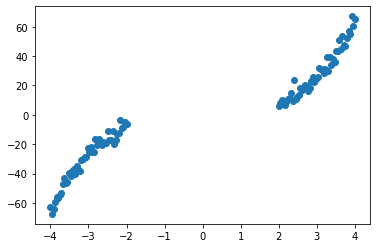

In [3]:
x, y, x_test = generate_data(number_of_points=50, noise_variance=9)

plt.scatter(x, y)

plt.show()

In [4]:
def experiment_LUNA_1D(n_aux, reg_param, lambda_in, step_size=1e-2, max_iteration=1500, x_train=x, y_train=y):
    activation_fn_type = 'relu'
    activation_fn = lambda x: np.maximum(np.zeros(x.shape), x)

    input_dim = 1
    output_dim = 1
    width = [50,50] # using the architecture used in the paper

    architecture = {
        'width': width,
        'input_dim': input_dim,
        'output_dim': output_dim,
        'activation_fn_type': 'relu',
        'activation_fn_params': 'rate=1',
        'activation_fn': activation_fn,
        'auxiliary_functions': n_aux,
    }

    params = {
        'step_size': step_size,
        'max_iteration': max_iteration,
        'random_restarts': 1,
        'reg_param': reg_param,
        'lambda_in': lambda_in,
    }

    rand_state = 207
    random = np.random.RandomState(rand_state)

    luna = LUNA(architecture, random=random)
    print("")
    print(f"===== [ Aux Functions: {n_aux} ] === [ Regularization: {reg_param} ] === [ Diversification: {lambda_in} ] =====")
    print("")
    t0 = time.time()
    luna.fit(x_train, y_train, params)
    print("")
    print("Training took {:} (h:mm:ss)".format(format_time(time.time()-t0)))

    return luna

In [5]:
n_aux = 10
reg_grid = [0., 0.5, 1., 5., 10.]
div_grid = [0., 10., 50., 100., 1000.]

In [6]:
luna_list = []
for reg in reg_grid:
    for div in div_grid:
        luna = experiment_LUNA_1D(n_aux, reg, div)
        luna_list.append(luna)


===== [ Aux Functions: 10 ] === [ Regularization: 0.0 ] === [ Diversification: 0.0 ] =====

Iteration 0 loss 11360.635998917067; gradient mag: 9231.362680808108
Iteration 100 loss 58.3848020287684; gradient mag: 37.94317178597577
Iteration 200 loss 24.7695539942923; gradient mag: 16.271393779675794
Iteration 300 loss 17.2858693659094; gradient mag: 6.570905205250107
Iteration 400 loss 15.096108762421892; gradient mag: 5.787068228082942
Iteration 500 loss 13.825652000584435; gradient mag: 2.277709293467691
Iteration 600 loss 12.800403685240632; gradient mag: 5.7565127161083725
Iteration 700 loss 11.58070471472061; gradient mag: 2.290147028507281
Iteration 800 loss 10.943423116202222; gradient mag: 1.5414171003653996
Iteration 900 loss 10.520461167939265; gradient mag: 1.369415279244725
Iteration 1000 loss 10.1897535140804; gradient mag: 1.750136438485739
Iteration 1100 loss 9.949611569981737; gradient mag: 3.907835824514346
Iteration 1200 loss 9.787074825596486; gradient mag: 2.1786868

Iteration 1400 loss 41.38994063697404; gradient mag: 5.873080217453297

Training took 0:00:57 (h:mm:ss)

===== [ Aux Functions: 10 ] === [ Regularization: 0.5 ] === [ Diversification: 50.0 ] =====

Iteration 0 loss 11436.267895063856; gradient mag: 9242.696938152814
Iteration 100 loss 135.28422488330196; gradient mag: 53.355260616091456
Iteration 200 loss 94.35262892501753; gradient mag: 45.69913029216098
Iteration 300 loss 91.69339584766124; gradient mag: 68.46249193445462
Iteration 400 loss 90.05750129336798; gradient mag: 38.991336920749504
Iteration 500 loss 89.38764232847325; gradient mag: 38.54311350077542
Iteration 600 loss 89.47470072904244; gradient mag: 31.534509622823776
Iteration 700 loss 89.27888395821736; gradient mag: 68.40574664750805
Iteration 800 loss 88.8677557725137; gradient mag: 42.36504925667467
Iteration 900 loss 88.43021724515546; gradient mag: 64.82569248712112
Iteration 1000 loss 90.56291649496956; gradient mag: 102.30852472671323
Iteration 1100 loss 88.99512

Iteration 1300 loss 157.44477536003012; gradient mag: 34.052236913168656
Iteration 1400 loss 158.54392201062205; gradient mag: 223.3960599173489

Training took 0:00:51 (h:mm:ss)

===== [ Aux Functions: 10 ] === [ Regularization: 1.0 ] === [ Diversification: 1000.0 ] =====

Iteration 0 loss 12366.523015045044; gradient mag: 9586.4063781733
Iteration 100 loss 707.2741837950542; gradient mag: 876.2326137908638
Iteration 200 loss 674.8343133139288; gradient mag: 1713.1282520716932
Iteration 300 loss 658.5875000561044; gradient mag: 1270.2601301900195
Iteration 400 loss 651.229789454346; gradient mag: 857.2505082630822
Iteration 500 loss 650.9911307159135; gradient mag: 823.0607097091445
Iteration 600 loss 647.59411878322; gradient mag: 1085.036020969193
Iteration 700 loss 646.4858029186221; gradient mag: 830.00134817097
Iteration 800 loss 649.117338019669; gradient mag: 1129.2420386939036
Iteration 900 loss 669.0317379057655; gradient mag: 2980.8764516078195
Iteration 1000 loss 650.8098878

Iteration 1200 loss 286.8221994335512; gradient mag: 8.869473178659526
Iteration 1300 loss 274.5447876516432; gradient mag: 9.001672843007734
Iteration 1400 loss 262.9428769561159; gradient mag: 8.596596247296942

Training took 0:00:50 (h:mm:ss)

===== [ Aux Functions: 10 ] === [ Regularization: 10.0 ] === [ Diversification: 10.0 ] =====

Iteration 0 loss 11933.661090200241; gradient mag: 9234.843652000007
Iteration 100 loss 538.9448262470818; gradient mag: 49.9902324525043
Iteration 200 loss 467.0668960674585; gradient mag: 14.88969501883855
Iteration 300 loss 443.18713513260843; gradient mag: 14.06728682910036
Iteration 400 loss 422.75441522762986; gradient mag: 11.579869106816748
Iteration 500 loss 403.78047430687815; gradient mag: 13.675310370973724
Iteration 600 loss 385.97088280726246; gradient mag: 13.899323655220748
Iteration 700 loss 369.1119589195743; gradient mag: 10.74538142083857
Iteration 800 loss 353.1236248711668; gradient mag: 11.583509330589319
Iteration 900 loss 337.

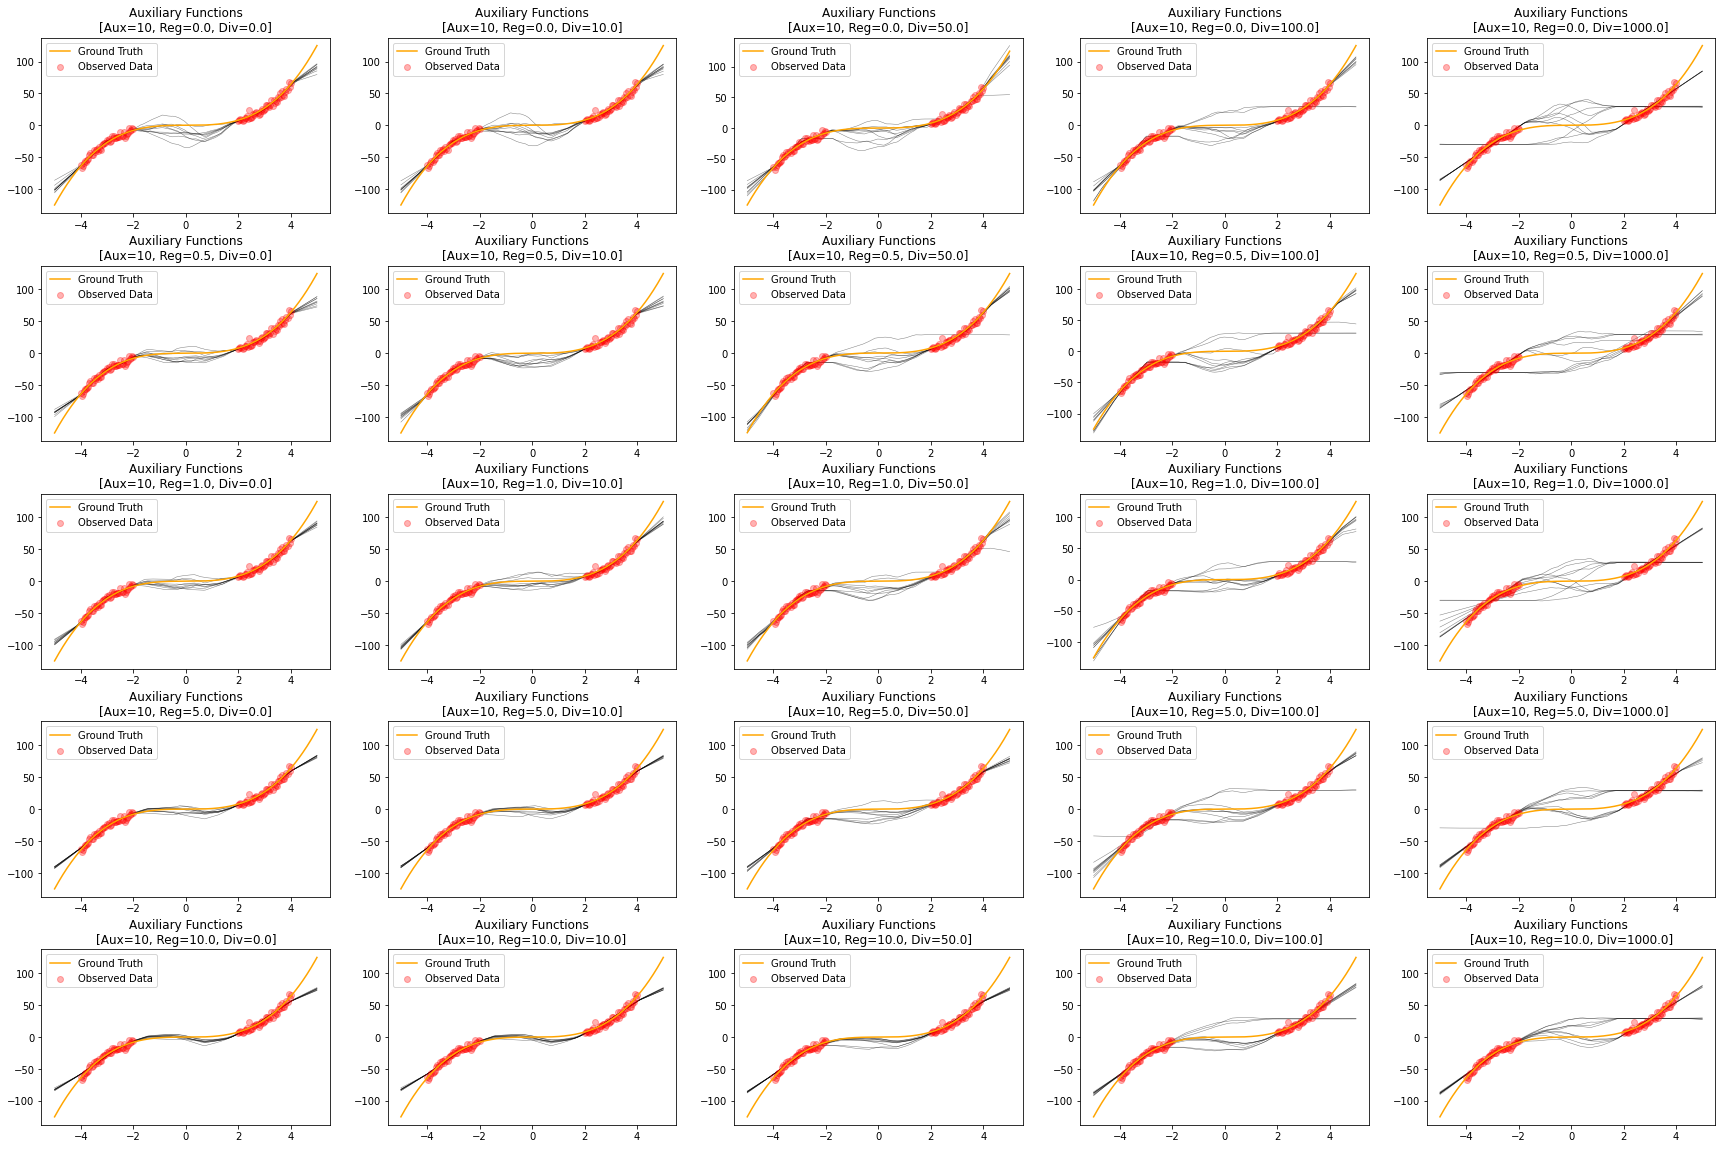

In [18]:
fig, axes = plt.subplots(len(reg_grid), len(div_grid), figsize=(30, 20))
for i, ax in enumerate(axes.flat):
    luna = luna_list[i]
    y_pred = luna.forward(luna.weights, x_test)
    ax.scatter(x[0,:], y[0,:], color='red', alpha=0.3, label='Observed Data')
    ax.plot(x_test[0,:], x_test[0,:]**3, color='orange', label="Ground Truth")
    ax.plot(x_test[0,:], np.squeeze(y_pred).T, color='black', linewidth=0.5, alpha=0.5, zorder=0)
    ax.set_title(f"Auxiliary Functions\n[Aux={luna.params['M']}, Reg={luna.params['reg_param']}, Div={luna.params['lambda_in']}]")
    ax.legend(loc='best')
plt.subplots_adjust(hspace=0.3)
plt.show()

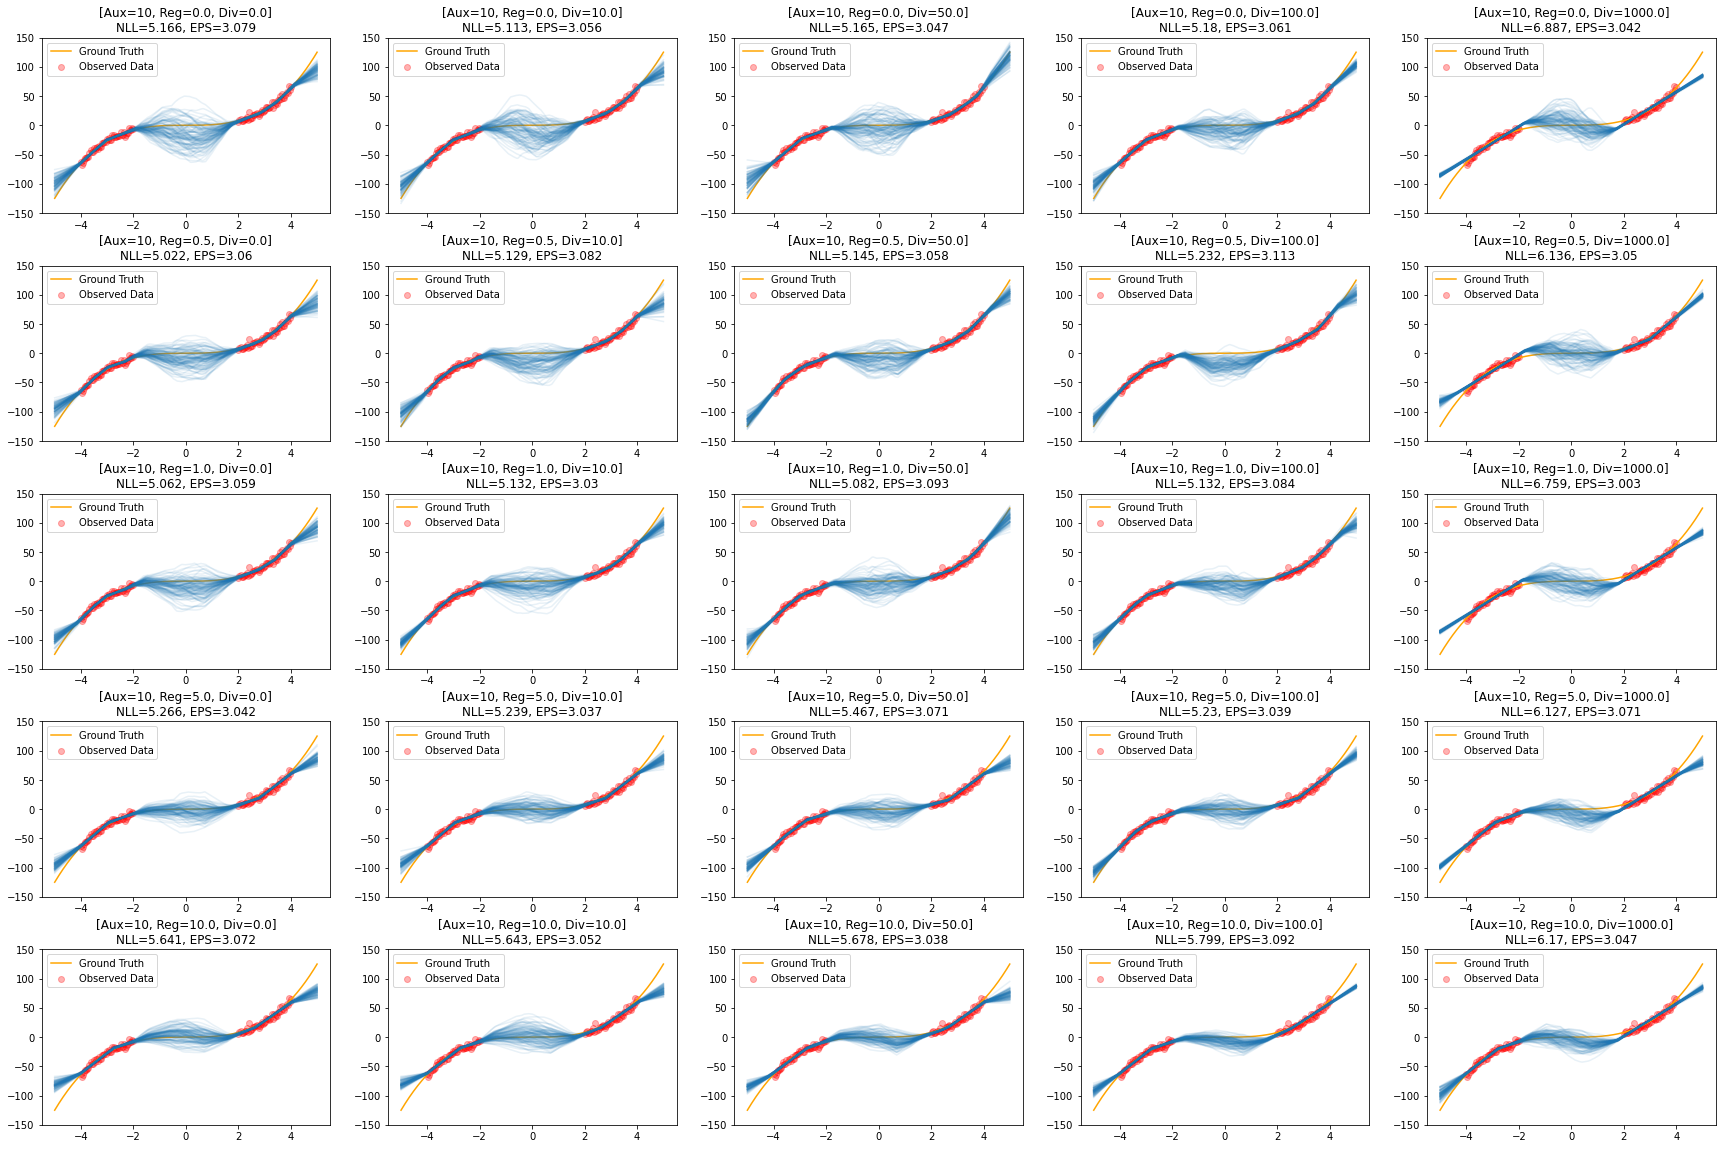

In [20]:
prior_mean = 0; prior_var = 3; noise_var = 9

fig, axes = plt.subplots(len(reg_grid), len(div_grid), figsize=(30, 20))
for i, ax in enumerate(axes.flat):
    luna = luna_list[i]
    y_posterior = luna.get_posterior_preds(x_test, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var)
    ax.scatter(x[0,:], y[0,:], color='red', alpha=0.3, label='Observed Data')
    ax.plot(x_test[0,:], x_test[0,:]**3, color='orange', label="Ground Truth")
    ax.plot(x_test[0,:], y_posterior.T, color='tab:blue', alpha=0.1)
    ax.set_ylim([-150, 150])
    y_posterior2 = luna.get_posterior_preds(x, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var)
    y_posterior2 = y_posterior2 + np.random.normal(0, noise_var**0.5, size=y_posterior2.shape)
    nll = np.round(neg_log_likelihood(y_posterior2, y, noise_var), 3)
    eps = np.round(epistemic_uncertainty(y_posterior2), 3)
    ax.set_title(f"[Aux={luna.params['M']}, Reg={luna.params['reg_param']}, Div={luna.params['lambda_in']}]\nNLL={nll}, EPS={eps}")
    ax.legend(loc='best')
plt.subplots_adjust(hspace=0.3)
plt.show()